In [1]:
%matplotlib inline

from matplotlib import pyplot

import geopandas as gpd
import numpy as np

import shapely.ops
import shapely.affinity as affine
import shapely.geometry as geom

from weavingspace.symmetry import Symmetries
import weavingspace.tiling_utils as tiling_utils
from weavingspace.tile_unit import TileUnit

### Some test polygons

In [2]:
polys = [
  tiling_utils.get_regular_polygon(1000, n = 4),
  tiling_utils.get_regular_polygon(1000, n = 5),
  TileUnit(tiling_type = "hex-dissection", n = 12).tiles.geometry[0],
  TileUnit(tiling_type = "hex-dissection", n = 6).tiles.geometry[1],
  TileUnit(tiling_type = "hex-dissection", n = 4).tiles.geometry[0],
  TileUnit(tiling_type = "hex-dissection", n = 3).tiles.geometry[0],
  affine.scale(tiling_utils.get_regular_polygon(1000, n = 3), 0.8, 0.9),
  TileUnit(tiling_type = "cairo", n = 3).tiles.geometry[0],
  affine.scale(tiling_utils.get_regular_polygon(500, 4), 2, 1)]

# translate to centroid (this is to make drawing easier, not required)
polys = [affine.translate(p, -p.centroid.x, -p.centroid.y) for p in polys]

### Find symmetries

In [18]:
symmetries = Symmetries(polys[7])
symmetries.get_rotations(), symmetries.get_reflections()

({'angles': [0.0], 'transforms': [array([ 1., -0.,  0.,  1.,  0.,  0.])]},
 {'angles': [-45.0], 'transforms': [array([ 0., -1., -1., -0.,  0.,  0.])]})

<Axes: >

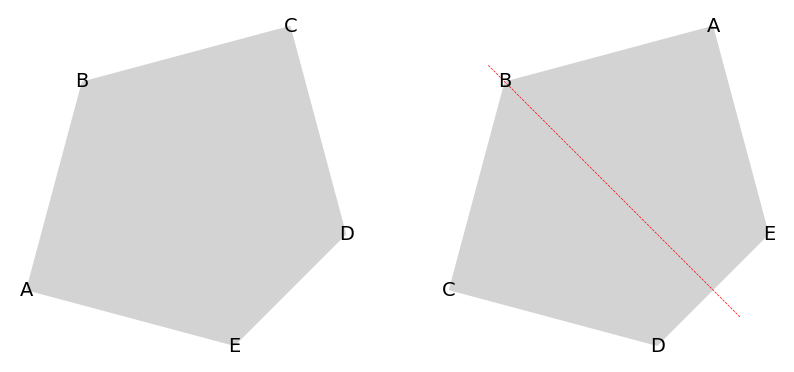

In [19]:
symmetries.plot()

In [20]:
symmetries.get_unique_labels()

['X', 'Y', 'X', 'Z', 'Z']